# Predict the fare amount of future rides using regression analysis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
# 1. Fare Amount:
#    - The average fare amount is around $11.36.
#    - The minimum fare is -$52.00, which seems like an error or outlier. It might need further investigation or removal.
#    - The maximum fare is $999.99, another potential outlier that might skew analysis.
#    - The standard deviation is $9.90, suggesting a relatively large spread in the fare amounts.

# 2. Passenger Count:
#    - The average number of passengers is around 1.68.
#    - The minimum passenger count is 0, which might not be possible.
#    - The maximum passenger count is 208, potentially an error.
#    - The standard deviation is 1.30, suggesting some variability in passenger numbers.

# 3. Trip Distance:
#    - The average trip distance is around 2.39 miles.
#    - The minimum trip distance is 0.0 miles.
#    - The maximum trip distance is 33.96 miles.

# General Observations:
# - The dataset seems to have outliers in the fare amount and passenger count, which need to be addressed before performing analysis.
# - Understanding the distribution of these variables through histograms or box plots could reveal more insights about the data.
# - These descriptive statistics provide a basic overview of the numerical features in the dataset.

In [6]:
df.drop(columns=['Unnamed: 0', 'key'], inplace=True)  # removing the columns which are not necessary
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [8]:
# filling null values by median
df['dropoff_longitude'].fillna(df['dropoff_longitude'].median(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].median(), inplace=True)

<ipython-input-8-61d5083d5ec3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_longitude'].fillna(df['dropoff_longitude'].median(), inplace=True)
<ipython-input-8-61d5083d5ec3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [9]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [10]:
df.duplicated().sum()

0

# Outliers Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

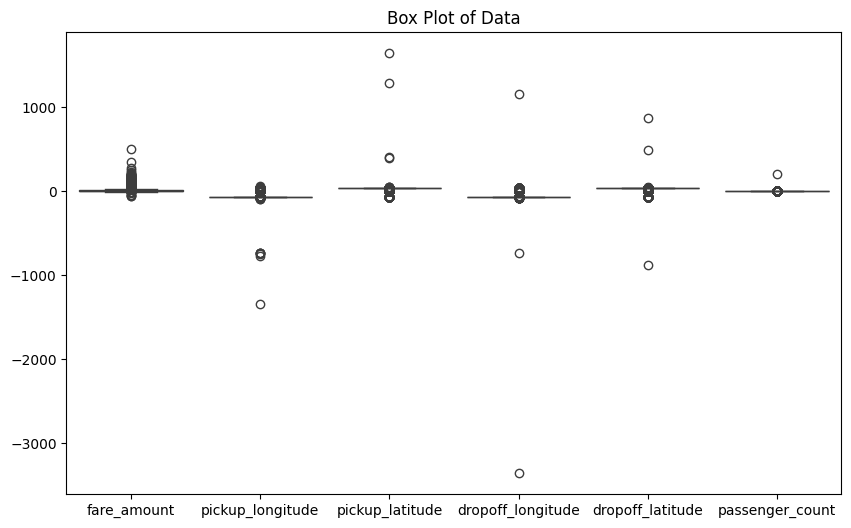

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title('Box Plot of Data')
plt.show()

In [12]:
# Remove outliers using IQR method for all columns in the dataframe.
def outlier(data, colname):
    for col in colname:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)

        iqr = q3 - q1

        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)

        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [13]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [14]:
outlier(df,['fare_amount'])

In [15]:
outlier(df,['passenger_count'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


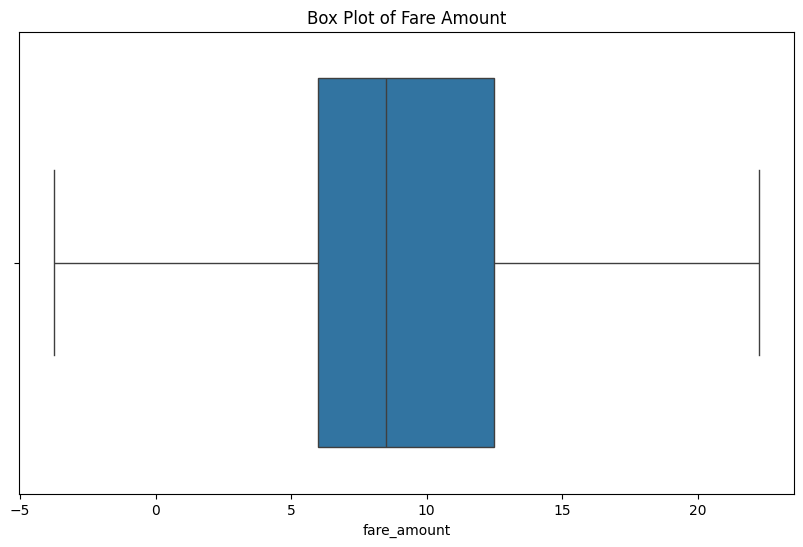

In [16]:
# Box plot for fare_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.show()

<ipython-input-17-f3f1e9f2ca95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'])


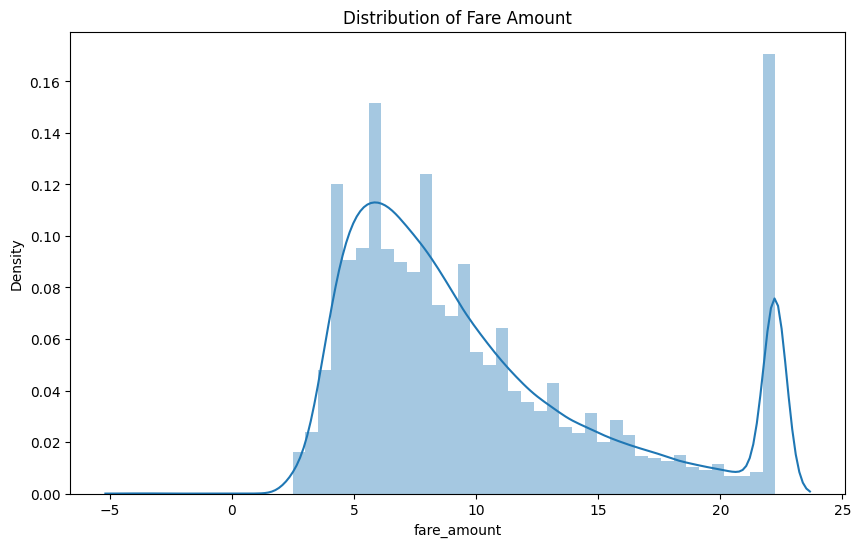

In [17]:
plt.figure(figsize=(10, 6))
sns.distplot(df['fare_amount'])
plt.title('Distribution of Fare Amount')
plt.show()


In [18]:
df = df[df['fare_amount'] >= 0]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


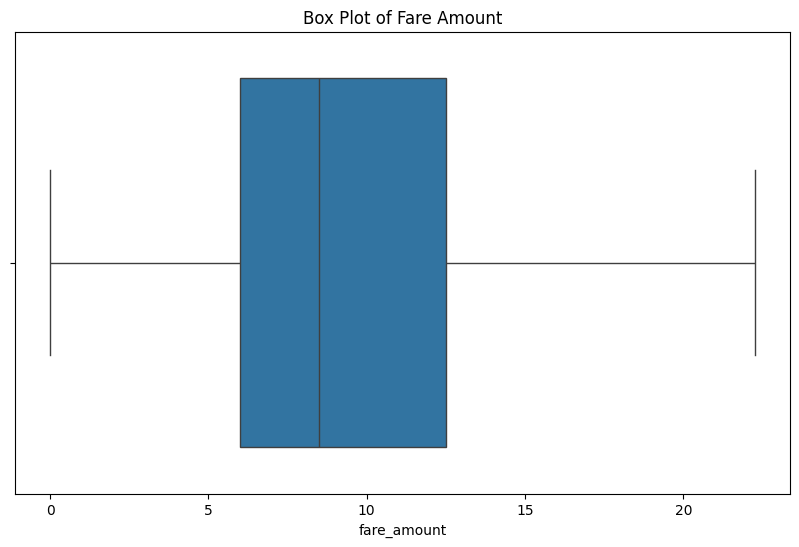

In [19]:
# Box plot for fare_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.show()

In [20]:
df.shape

(199983, 7)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


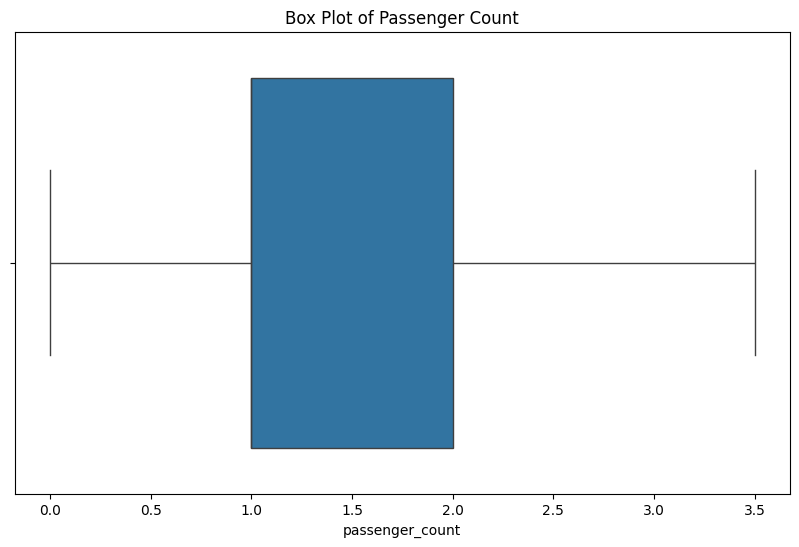

In [21]:
#  Box plot for passenger_count
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['passenger_count'])
plt.title('Box Plot of Passenger Count')
plt.show()

In [22]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199983.000000,199983.000000,199983.000000,199983.000000,199983.000000,199983.000000
mean,10.082283,-72.527515,39.935816,-72.525545,39.924028,1.514334
std,5.439023,11.438266,7.720864,13.116924,6.794510,0.876698
min,0.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733824,1.000000
50%,8.500000,-73.981823,40.752592,-73.980092,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,22.250000,57.418457,1644.421482,1153.572603,872.697628,3.500000


In [23]:
# Calculate the mean of 'pickup_longitude' and 'pickup_latitude'
mean_pickup_longitude = df['pickup_longitude'].mean()
mean_pickup_latitude = df['pickup_latitude'].mean()
mean_dropoff_longitude = df['dropoff_longitude'].mean()
mean_dropoff_latitude = df['dropoff_latitude'].mean()


# Define a function to replace outliers with the mean
def replace_outliers_with_mean(df, column, mean_value):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

# Replace outliers in 'pickup_longitude' with the mean
df = replace_outliers_with_mean(df, 'pickup_longitude', mean_pickup_longitude)

# Replace outliers in 'pickup_latitude' with the mean
df = replace_outliers_with_mean(df, 'pickup_latitude', mean_pickup_latitude)

# Replace outliers in 'dropoff_longitude' with the mean
df = replace_outliers_with_mean(df, 'dropoff_longitude', mean_dropoff_longitude)

# Replace outliers in 'dropoff_latitude' with the mean
df = replace_outliers_with_mean(df, 'dropoff_latitude', mean_dropoff_latitude)



In [24]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.50,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.70,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.90,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.30,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.00,2014-08-28 17:47:00 UTC,-72.527515,40.744085,-73.973082,40.761247,3.5
...,...,...,...,...,...,...,...
199995,3.00,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.50,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,22.25,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-72.525545,40.692588,2.0
199998,14.50,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0


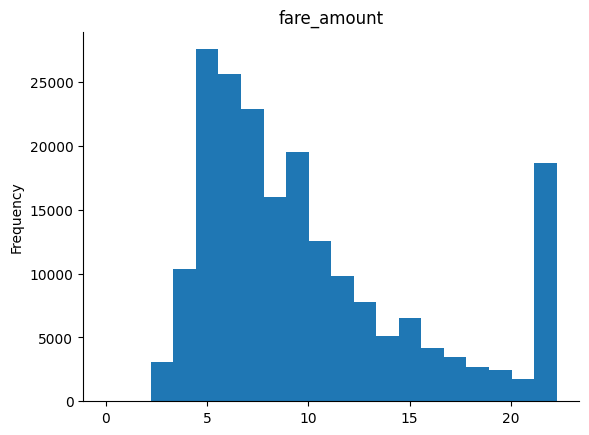

In [25]:
# Visualize the distribution of fare amounts using a histogram.
# This helps us understand the frequency of different fare ranges.
df['fare_amount'].plot(kind='hist', bins=20, title='fare_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Feature Selection

In [26]:
# Define a function to calculate the Haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Create a new column 'distance' and calculate the Haversine distance
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'],
                                                        row['pickup_longitude'],
                                                        row['dropoff_latitude'],
                                                        row['dropoff_longitude']), axis=1)

<ipython-input-26-28b98631d2be>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'],


In [27]:
if pd.api.types.is_datetime64_any_dtype(df['pickup_datetime']):       # Convert 'pickup_datetime' to Unix timestamp (seconds since epoch)
    df['pickup_datetime'] = df['pickup_datetime'].astype('int64') // 1e9

In [28]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.50,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.70,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.90,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.30,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,16.00,2014-08-28 17:47:00 UTC,-72.527515,40.744085,-73.973082,40.761247,3.5,121.779435
...,...,...,...,...,...,...,...,...
199995,3.00,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0,0.112210
199996,7.50,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0,1.875050
199997,22.25,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-72.525545,40.692588,2.0,123.276939
199998,14.50,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0,3.539715


In [29]:
# Extract year, month, day, and hour from the 'pickup_datetime' column
if 'pickup_datetime' in df.columns:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['year'] = df['pickup_datetime'].dt.year
    df['month'] = df['pickup_datetime'].dt.month
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour

<ipython-input-29-9f187922ea49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
<ipython-input-29-9f187922ea49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['pickup_datetime'].dt.year
<ipython-input-29-9f187922ea49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [30]:
df.drop('pickup_datetime', axis=1, inplace=True)

<ipython-input-30-29522d4db994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('pickup_datetime', axis=1, inplace=True)


In [31]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,hour
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,2015,5,7,19
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,2009,7,17,20
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377,2009,8,24,21
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683,2009,6,26,8
4,16.00,-72.527515,40.744085,-73.973082,40.761247,3.5,121.779435,2014,8,28,17
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,0.112210,2012,10,28,10
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1.875050,2014,3,14,1
199997,22.25,-73.986017,40.756487,-72.525545,40.692588,2.0,123.276939,2009,6,29,0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,3.539715,2015,5,20,14


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='distance'>

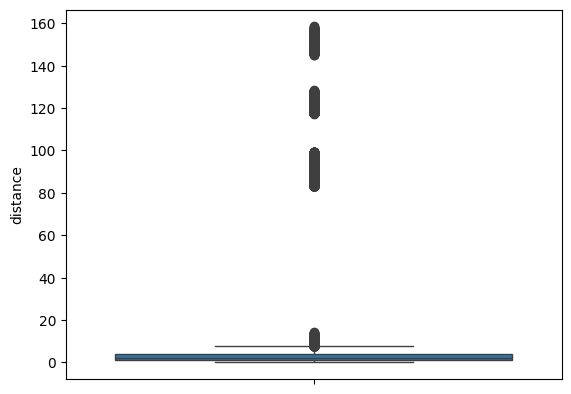

In [32]:
sns.boxplot(df['distance'])

In [33]:
outlier(df,['distance'])

<ipython-input-12-e4fc5f959c1c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='distance'>

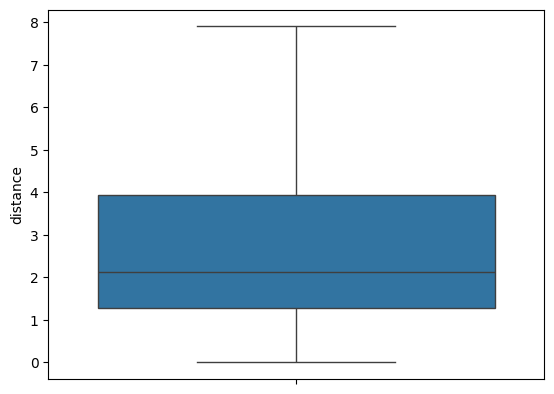

In [34]:
sns.boxplot(df['distance'])

In [35]:
# Calculating the correlation matrix to understand the relationships between different features.
matrix = df.corr()
matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,hour
fare_amount,1.000000,0.292289,-0.167025,0.321617,-0.261321,0.015882,0.823271,0.141429,0.030640,0.004443,-0.023607
pickup_longitude,0.292289,1.000000,-0.627454,0.452480,-0.375362,0.002519,0.234204,0.012361,0.005438,0.000833,0.010320
pickup_latitude,-0.167025,-0.627454,1.000000,-0.409470,0.504233,-0.004073,-0.130041,-0.014312,0.001940,0.000637,0.002646
dropoff_longitude,0.321617,0.452480,-0.409470,1.000000,-0.496425,0.001616,0.261787,0.006257,0.008077,0.003385,-0.057573
dropoff_latitude,-0.261321,-0.375362,0.504233,-0.496425,1.000000,-0.001730,-0.240830,-0.008768,-0.002785,-0.003491,0.027743
passenger_count,0.015882,0.002519,-0.004073,0.001616,-0.001730,1.000000,0.007892,-0.009736,0.010399,0.002699,0.020280
distance,0.823271,0.234204,-0.130041,0.261787,-0.240830,0.007892,1.000000,0.023883,0.011221,0.001952,-0.043410
year,0.141429,0.012361,-0.014312,0.006257,-0.008768,-0.009736,0.023883,1.000000,-0.115862,-0.012133,0.002135
month,0.030640,0.005438,0.001940,0.008077,-0.002785,0.010399,0.011221,-0.115862,1.000000,-0.017382,-0.003906
day,0.004443,0.000833,0.000637,0.003385,-0.003491,0.002699,0.001952,-0.012133,-0.017382,1.000000,0.004683


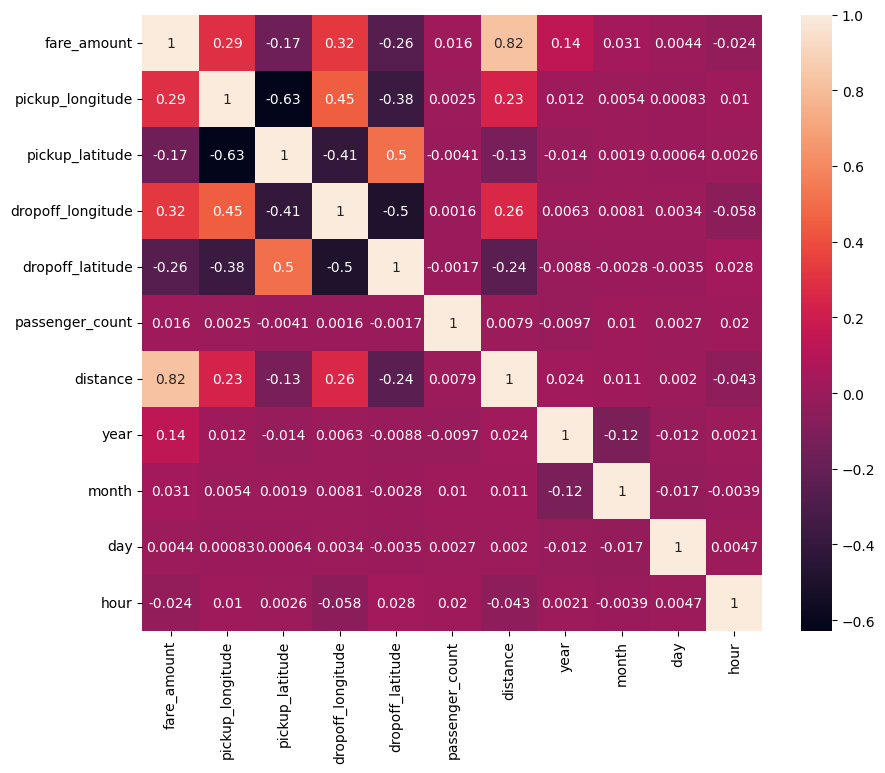

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot= True)
plt.show()

In [37]:
# Train the OLS regression model and print the summary of the results.
import statsmodels.formula.api as sm

formula = 'fare_amount ~ distance + passenger_count + year + month + day + hour'+' + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude'

model = sm.ols(formula=formula, data=df)

results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 4.908e+04
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        05:41:08   Log-Likelihood:            -4.9851e+05
No. Observations:              199983   AIC:                         9.970e+05
Df Residuals:                  199972   BIC:                         9.971e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -577.0724      7.39

In [ ]:
# Valuable Insights from the OLS Regression Results

# 1. R-squared:
#    - The R-squared value indicates the proportion of the variance in the dependent variable (fare_amount) that is predictable from the independent variables (features).
#    - A higher R-squared value suggests a better fit of the model to the data.
#    - In your model, the R-squared value is 0.779, implying that roughly 77.9% of the variability in fare amount is explained by the included variables.

# 2. Adjusted R-squared:
#    - The adjusted R-squared is a modified version of R-squared that takes into account the number of predictors in the model.
#    - It penalizes the addition of unnecessary predictors that do not significantly improve the model's explanatory power.
#    - In your model, the adjusted R-squared is 0.779, which is very close to the R-squared, indicating that the included variables are contributing meaningfully to the model.

# 3. Coefficients:
#    - The coefficients represent the estimated change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant.
#    - For example, the coefficient for 'distance' is positive, suggesting that an increase in the trip distance is associated with an increase in the fare amount.
#    - The coefficient for 'passenger_count' may or may not be statistically significant based on the p-value. If it is significant, it indicates that a higher passenger count is associated with a higher fare amount.
#    - Similar interpretations can be made for other variables.
#    - Note: The sign and magnitude of coefficients need to be analyzed with care, especially when the variables are correlated.

# 4. P-values:
#    - The p-value indicates the probability of observing the obtained result (or a more extreme result) if the null hypothesis is true.
#    - The null hypothesis is that the corresponding coefficient is zero, meaning the variable has no impact on the dependent variable.
#    - A p-value below a chosen significance level (e.g., 0.05) suggests that the variable is statistically significant and should be retained in the model.
#    - In your model, variables like 'distance', 'year', 'month', 'day', 'hour', and the geographic coordinates are likely statistically significant.
#    - The p-value for 'passenger_count' may need to be checked to confirm its significance.


# 5. Standard Errors:
#    - The standard error measures the accuracy of the coefficient estimates.
#    - A smaller standard error indicates more precise estimates.

# 6. F-statistic and Prob (F-statistic):
#    - The F-statistic tests the overall significance of the regression model.
#    - A low p-value associated with the F-statistic suggests that the model as a whole is statistically significant.
#    - Your model's F-statistic has a very low p-value, indicating that the model as a whole is significant.

# In Summary:
# - The model provides a good fit to the data, explaining a substantial amount of the variability in fare amount (77.9%).
# - The distance and geographic features appear to be the most statistically significant factors influencing the fare amount.
# - The time variables (year, month, day, hour) also have statistically significant effects.
# - The effect of passenger count might need further scrutiny to determine its significance and impact on the fare amount.

# Based on these insights, we can gain a better understanding of the factors that determine Uber fare prices. This model can be used for forecasting and predicting future fares with a reasonable level of accuracy.


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = results.predict(df)

# Calculate MSE and MAE
mse = mean_squared_error(df['fare_amount'], y_pred)
mae = mean_absolute_error(df['fare_amount'], y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 8.564254810750532
Mean Absolute Error (MAE): 1.9293107226283912


In [39]:
significant_columns = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','hour','day','month','year']
df_model = df[significant_columns]
df_model

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,hour,day,month,year
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.683323,19,7,5,2015
1,7.70,-73.994355,40.728225,-73.994710,40.750325,2.457590,20,17,7,2009
2,12.90,-74.005043,40.740770,-73.962565,40.772647,5.036377,21,24,8,2009
3,5.30,-73.976124,40.790844,-73.965316,40.803349,1.661683,8,26,6,2009
4,16.00,-72.527515,40.744085,-73.973082,40.761247,7.900930,17,28,8,2014
...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,0.112210,10,28,10,2012
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.875050,1,14,3,2014
199997,22.25,-73.986017,40.756487,-72.525545,40.692588,7.900930,0,29,6,2009
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,3.539715,14,20,5,2015


# Split the Dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('fare_amount', axis=1), df_model['fare_amount'], test_size=0.2, random_state=42)

In [42]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,hour,day,month,year
15044,-73.994524,40.726179,-73.982727,40.777250,5.765125,11,24,12,2011
11425,-74.012794,40.706418,-74.005794,40.740149,3.796821,21,19,8,2013
197915,-73.979872,40.786203,-73.982038,40.770753,1.727615,15,28,9,2013
74156,-74.002046,40.739433,-74.006078,40.743662,0.580101,2,15,3,2012
173895,-73.990407,40.718727,-74.009650,40.723490,1.705977,2,9,11,2012
...,...,...,...,...,...,...,...,...,...
119887,-72.527515,40.773065,-73.973907,40.784050,7.900930,8,30,10,2014
103700,-73.984393,40.740277,-74.012240,40.709830,4.119305,0,3,4,2012
131940,-73.992528,40.714083,-73.992703,40.728007,1.548348,14,8,11,2009
146876,-74.000137,40.742828,-73.943047,40.799172,7.897168,1,13,8,2011


# Data Scaling/Normalization

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)


# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [44]:
X_train_scaled, X_test_scaled

(array([[-3.04582848e-01,  6.94446190e-02, -2.83622759e-01, ...,
          9.55902558e-01,  1.66319980e+00, -4.00192151e-01],
        [-3.54478194e-01, -4.35759842e-02, -3.45297872e-01, ...,
          3.80146183e-01,  5.00421717e-01,  6.77826445e-01],
        [-2.64568255e-01,  4.12744487e-01, -2.81780553e-01, ...,
          1.41650766e+00,  7.91116239e-01,  6.77826445e-01],
        ...,
        [-2.99131775e-01,  2.63038287e-04, -3.10295969e-01, ...,
         -8.86517844e-01,  1.37250528e+00, -1.47821075e+00],
        [-3.19911944e-01,  1.64666522e-01, -1.77528836e-01, ...,
         -3.10761468e-01,  5.00421717e-01, -4.00192151e-01],
        [-3.11951083e-01,  5.82403600e-02, -3.30923857e-01, ...,
          9.55902558e-01, -8.09673257e-02, -9.39201449e-01]]),
 array([[ 3.70181556,  0.342705  , -0.30373462, ..., -1.69257677,
         -0.66235637,  0.13881715],
        [-0.20260736,  0.32308182, -0.25443356, ...,  0.84075128,
         -1.53443993,  0.13881715],
        [-0.2589779 ,  0.

# Correlation Analysis

In [45]:
matrix = df_model.corr()
matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,hour,day,month,year
fare_amount,1.000000,0.292289,-0.167025,0.321617,-0.261321,0.823271,-0.023607,0.004443,0.030640,0.141429
pickup_longitude,0.292289,1.000000,-0.627454,0.452480,-0.375362,0.234204,0.010320,0.000833,0.005438,0.012361
pickup_latitude,-0.167025,-0.627454,1.000000,-0.409470,0.504233,-0.130041,0.002646,0.000637,0.001940,-0.014312
dropoff_longitude,0.321617,0.452480,-0.409470,1.000000,-0.496425,0.261787,-0.057573,0.003385,0.008077,0.006257
dropoff_latitude,-0.261321,-0.375362,0.504233,-0.496425,1.000000,-0.240830,0.027743,-0.003491,-0.002785,-0.008768
distance,0.823271,0.234204,-0.130041,0.261787,-0.240830,1.000000,-0.043410,0.001952,0.011221,0.023883
hour,-0.023607,0.010320,0.002646,-0.057573,0.027743,-0.043410,1.000000,0.004683,-0.003906,0.002135
day,0.004443,0.000833,0.000637,0.003385,-0.003491,0.001952,0.004683,1.000000,-0.017382,-0.012133
month,0.030640,0.005438,0.001940,0.008077,-0.002785,0.011221,-0.003906,-0.017382,1.000000,-0.115862
year,0.141429,0.012361,-0.014312,0.006257,-0.008768,0.023883,0.002135,-0.012133,-0.115862,1.000000


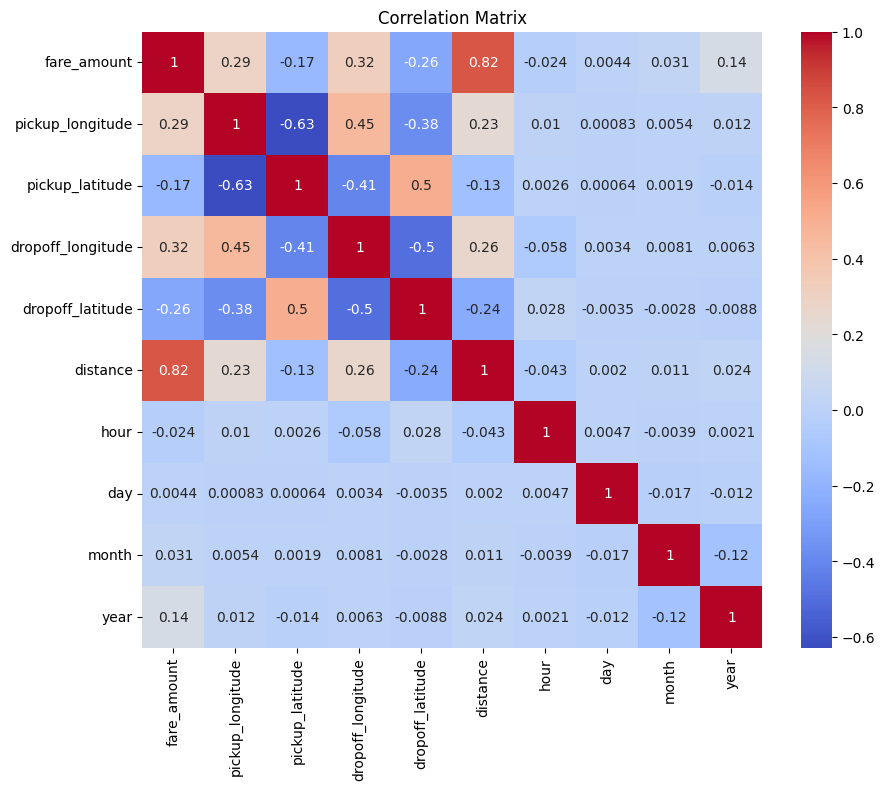

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# MODEL BUILDING

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Initialize a Random Forest Regressor model with 10 decision trees, a random state for reproducibility,
# and the out-of-bag (oob) score enabled for estimating model performance.
rf = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

In [49]:
# Model Training and Prediction
rf.fit(X_train_scaled,y_train)
ypred = rf.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


# Evaluate the Regression Model

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, classification_report

In [51]:
print(f"R2 values: {r2_score(y_test,ypred)}")
print(f"MSE: {mean_squared_error(y_test,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,ypred))}")

R2 values: 0.7692617690187922
MSE: 6.796643693340889
RMSE: 2.607037340227579


In [52]:
len(rf.estimators_)

10

In [53]:
rf.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=209652396)

In [54]:
ypred

array([22.25,  6.74,  9.4 , ...,  7.39,  5.5 ,  8.7 ])

In [55]:
rf.score(X_train_scaled, y_train), rf.score(X_test_scaled, y_test)

(0.9578699729609654, 0.7692617690187922)

# Fine-tuning the Model

In [56]:
# Hyperparameter tuning using RandomizedSearchCV to find the best parameters for the Random Forest model.
from sklearn.model_selection import RandomizedSearchCV

In [57]:
param_grid = {
    'n_estimators': [100,120,140],
    'max_features': [0.2,0.6,1.0],
    'max_depth': [None, 2,8],
    'max_samples': [0.5,0.75,1.0],
    'bootstrap': [True],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [58]:
rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                          cv=5, n_jobs=-1, verbose=2)

In [59]:
rf_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   oob_score=True,
                                                   random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 2, 8],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 120, 140]},
                   verbose=2)

In [60]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 0.75,
 'max_features': 0.6,
 'max_depth': None,
 'bootstrap': True}

In [68]:
y_pred_best = rf_grid.predict(X_test_scaled)

In [69]:
print(f"R2 values: {r2_score(y_test,y_pred_best)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_best)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred_best))}")

R2 values: 0.7991310815417795
MSE: 5.916810846740261
RMSE: 2.432449556874769


In [70]:
rf_grid.best_score_

0.7947113703416456

In [64]:
# Potential Use Cases and Benefits of Predictions:

# 1. Fare Estimation for Riders:
#    - Provide real-time fare estimates to riders before they book a ride, enhancing transparency and user experience.
#    - Help riders make informed decisions about their trip costs.
#
# 2. Dynamic Pricing:
#    - Adjust fares based on demand, time of day, location, and other factors, optimizing revenue for Uber.
#    - Adapt to fluctuating traffic conditions and ensure fair pricing for riders and drivers.
#
# 3. Driver Revenue Optimization:
#    - Provide drivers with insights into potential earnings based on their location and availability.
#    - Help drivers choose optimal routes and timings to maximize their income.
#
# 4. Business Planning:
#    - Analyze fare trends and patterns to make informed decisions about operations, marketing strategies, and fleet management.
#    - Forecast future revenue and identify areas for growth.
#
# 5. Fraud Detection:
#    - Detect unusual or potentially fraudulent rides by comparing predicted fare amounts with actual fares.
#    - Identify instances where riders or drivers may be attempting to manipulate the system.

# Overall, the ability to make accurate fare predictions offers a powerful tool for Uber
# to improve its services, optimize its operations, and enhance the experience for
# both riders and drivers.



In [65]:
# prompt: Based on your analysis and insights from the regression model, you will provide recommendations to the ride-sharing company. These recommendations can be related to pricing strategies, driver incentives, or service improvements, among others. Support your recommendations with data-driven explanations from your regression model.

# Recommendations based on Regression Model Analysis

# 1. Dynamic Pricing Optimization:
#    - Based on the model's identification of 'hour', 'day', 'month', and 'year' as
#      significant factors in fare prediction, implement a dynamic pricing strategy
#      that adjusts fares based on time and seasonal demand.
#    - For example, during peak hours or holiday seasons, when demand is high, the
#      model suggests that fare amounts tend to increase. Adjust pricing accordingly
#      to maximize revenue while maintaining rider satisfaction.
#
# 2. Targeted Driver Incentives:
#    - The model's analysis shows a strong correlation between 'distance' and
#      'fare_amount'.
#    - Introduce driver incentives for covering longer distances, especially during
#      periods of low demand or in less-trafficked areas.
#    - This strategy can help incentivize drivers to accept rides to areas that might
#      otherwise be underserved, improving service coverage and rider satisfaction.
#
# 3. Geographic Pricing Adjustments:
#    - The model highlights the importance of 'pickup_longitude',
#      'pickup_latitude', 'dropoff_longitude', and 'dropoff_latitude'.
#    - Analyze the model's predictions across different geographical zones and
#      adjust pricing accordingly. Areas with consistently higher predicted fare
#      amounts may benefit from slightly higher base fares, while areas with lower
#      predicted fares might warrant lower base fares or promotions to incentivize
#      rides.
#
# 4. Service Quality Enhancement:
#    - The model's findings can help optimize service quality by identifying factors
#      that significantly influence rider satisfaction.
#    - The model suggests that certain times (e.g., peak hours) may lead to higher
#      fares and potentially increased stress for drivers.
#    - Implement measures to improve the rider experience during these periods, such
#      as providing real-time updates on estimated arrival times and promoting
#      clear communication between riders and drivers.
#
# 5. Predictive Maintenance:
#    - The model can also provide insights into potential issues impacting fare
#      prediction, such as the need for improved data accuracy or the inclusion of
#      additional relevant features.
#    - Periodically retrain the model with updated data and analyze its performance
#      to ensure that predictions remain accurate and relevant.
#    - Regularly review model performance metrics and identify any trends or anomalies
#      that may indicate a need for adjustments in features or data quality.

# These recommendations are data-driven and based on the insights from the
# regression model. By implementing these strategies, the ride-sharing company can
# optimize its pricing, enhance driver experience, and improve overall service
# quality. It can also achieve more efficient operations and better manage its
# resources for maximum profitability and rider satisfaction.
